# **Loading libraries and data**

In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


In [52]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

# **Understanding the data**

In [53]:
df.shape

(7043, 21)

In [54]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Data Manipulation**

In [56]:
df.drop('customerID',axis=1,inplace=True)

In [57]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [58]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [59]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [60]:
df['TotalCharges'].isnull().sum()

11

In [61]:
df.dropna(axis=0,inplace=True)

In [62]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:
for i in df.columns:
    print(df[i].value_counts())

gender
Male      3549
Female    3483
Name: count, dtype: int64
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64
Partner
No     3639
Yes    3393
Name: count, dtype: int64
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
DeviceProtection
No                     3094
Yes                    2418
No

In [64]:
df['PaymentMethod']=df['PaymentMethod'].replace({'Bank transfer (automatic)':'Automatic','Credit card (automatic)':'Automatic'})
df['PaymentMethod'].value_counts()

PaymentMethod
Automatic           3063
Electronic check    2365
Mailed check        1604
Name: count, dtype: int64

# **EDA**

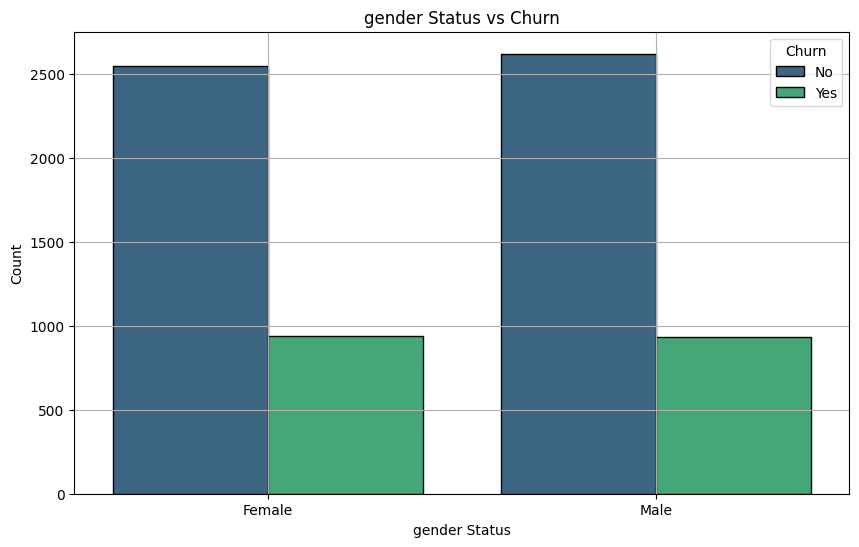

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', hue='Churn', palette='viridis', edgecolor='black')

plt.title('gender Status vs Churn')
plt.xlabel('gender Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

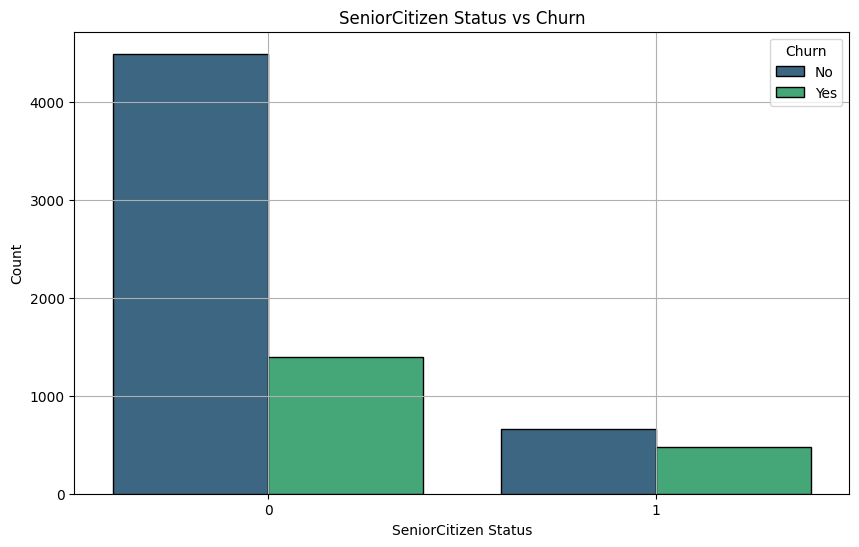

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='viridis', edgecolor='black')

plt.title('SeniorCitizen Status vs Churn')
plt.xlabel('SeniorCitizen Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

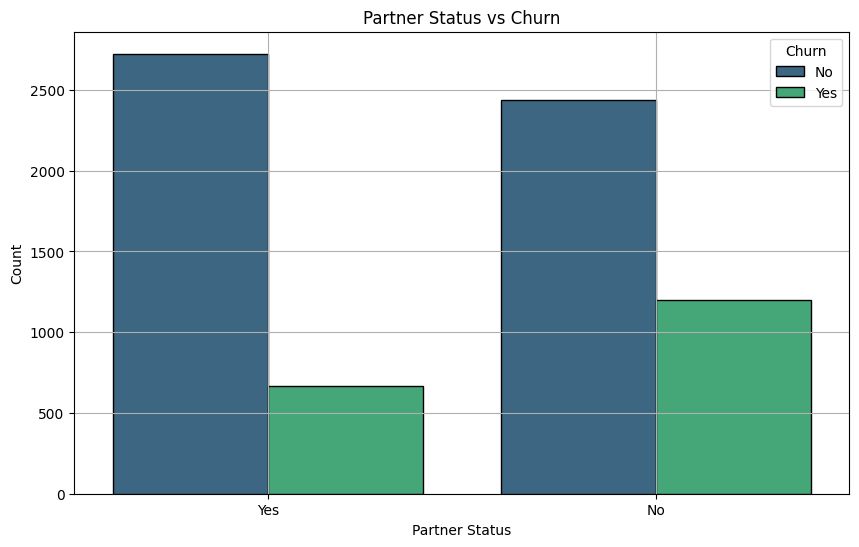

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Partner', hue='Churn', palette='viridis', edgecolor='black')

plt.title('Partner Status vs Churn')
plt.xlabel('Partner Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

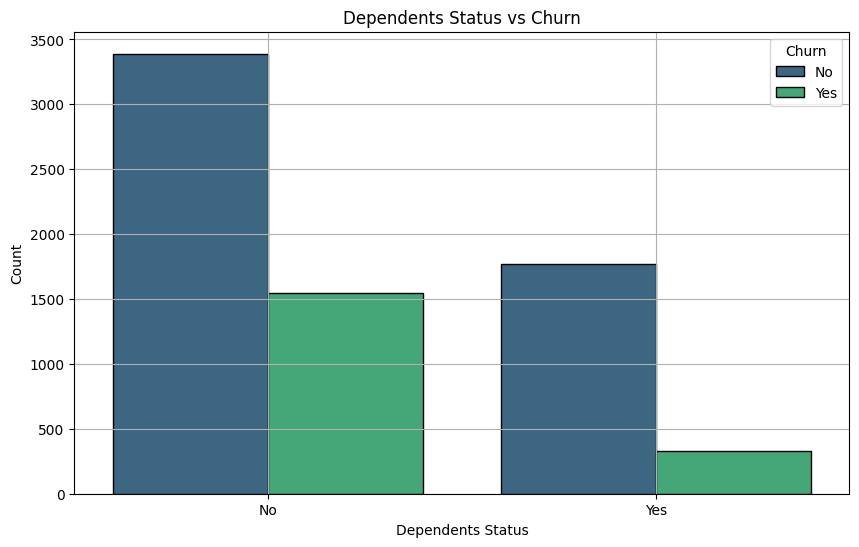

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Dependents', hue='Churn', palette='viridis', edgecolor='black')

plt.title('Dependents Status vs Churn')
plt.xlabel('Dependents Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

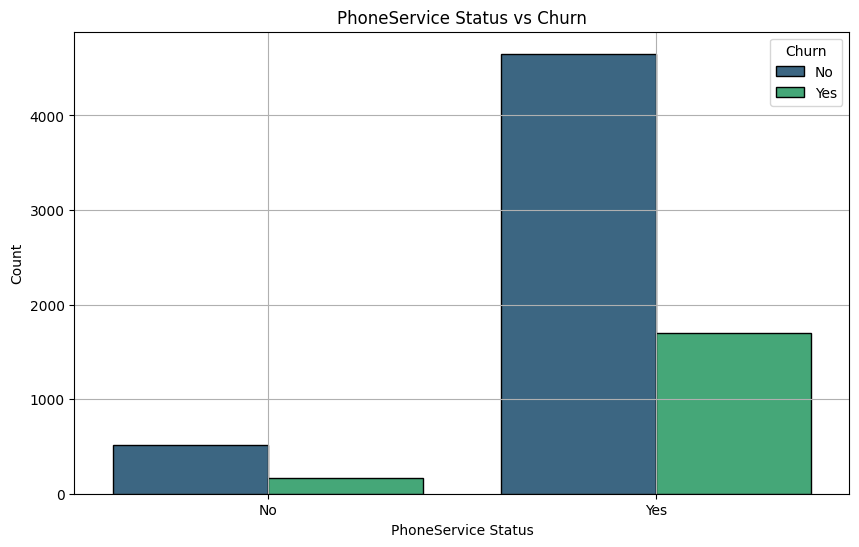

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PhoneService', hue='Churn', palette='viridis', edgecolor='black')

plt.title('PhoneService Status vs Churn')
plt.xlabel('PhoneService Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

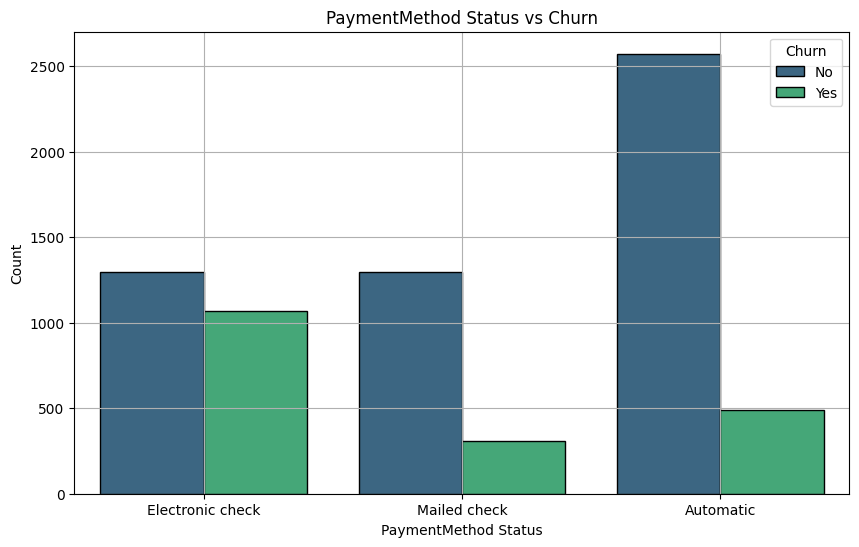

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='viridis', edgecolor='black')

plt.title('PaymentMethod Status vs Churn')
plt.xlabel('PaymentMethod Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()


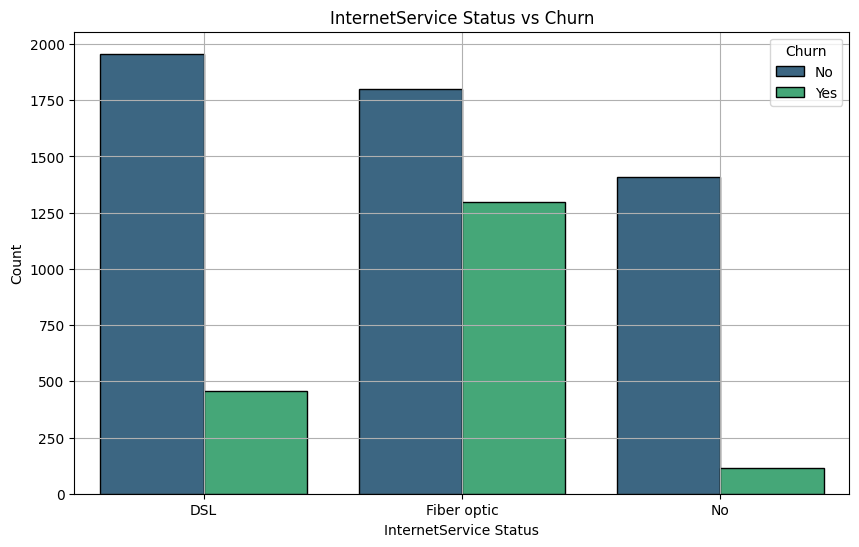

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='viridis', edgecolor='black')

plt.title('InternetService Status vs Churn')
plt.xlabel('InternetService Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

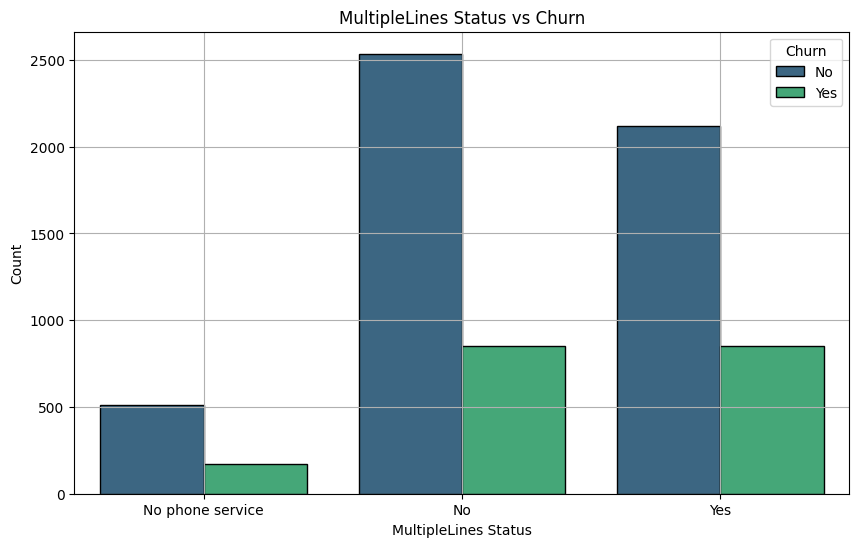

In [72]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MultipleLines', hue='Churn', palette='viridis', edgecolor='black')

plt.title('MultipleLines Status vs Churn')
plt.xlabel('MultipleLines Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

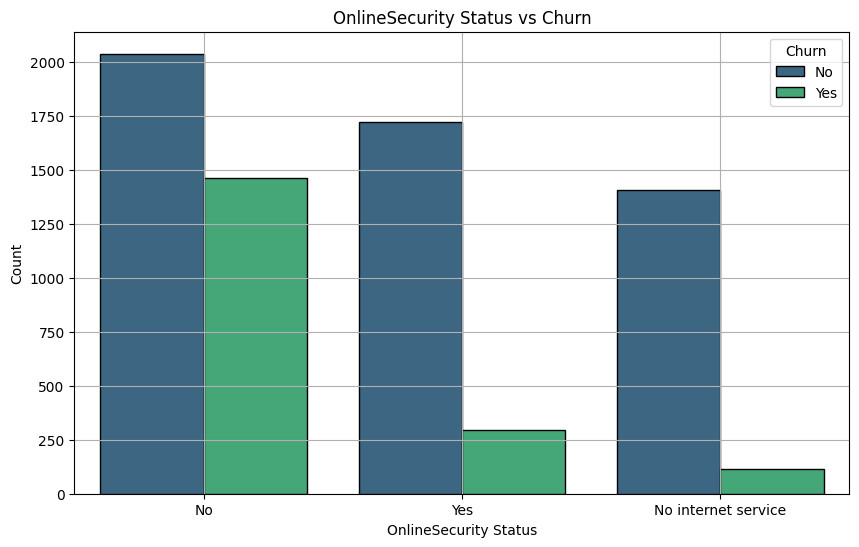

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette='viridis', edgecolor='black')

plt.title('OnlineSecurity Status vs Churn')
plt.xlabel('OnlineSecurity Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

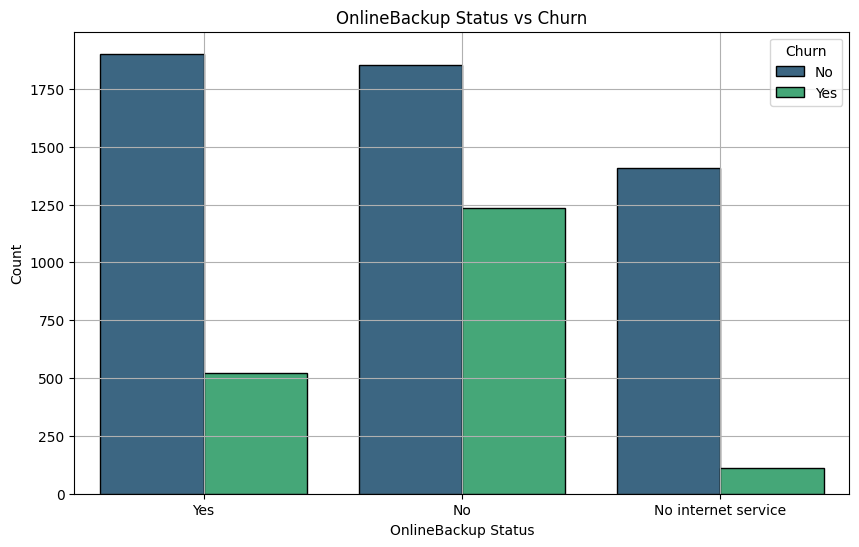

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OnlineBackup', hue='Churn', palette='viridis', edgecolor='black')

plt.title('OnlineBackup Status vs Churn')
plt.xlabel('OnlineBackup Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

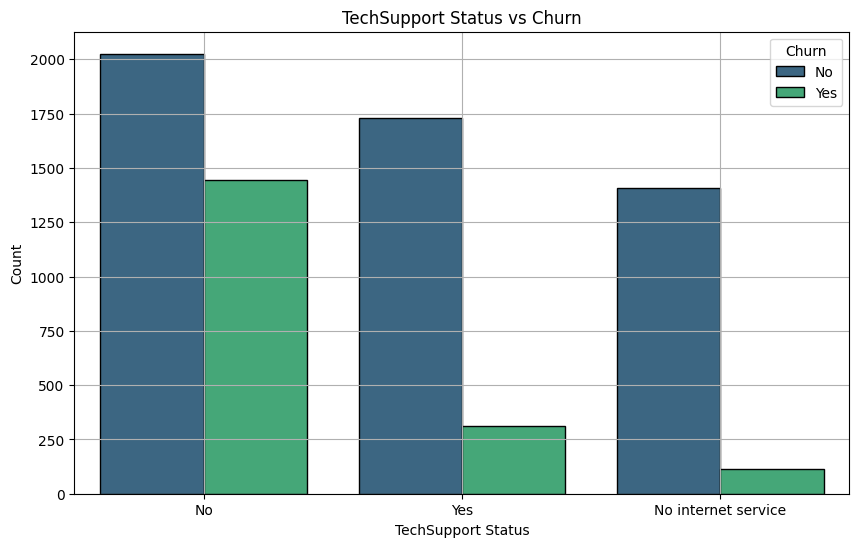

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TechSupport', hue='Churn', palette='viridis', edgecolor='black')

plt.title('TechSupport Status vs Churn')
plt.xlabel('TechSupport Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

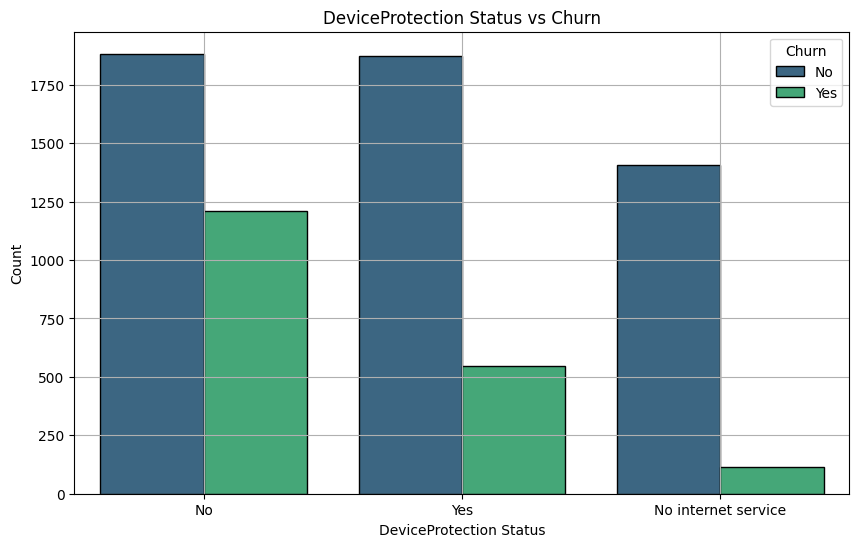

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DeviceProtection', hue='Churn', palette='viridis', edgecolor='black')

plt.title('DeviceProtection Status vs Churn')
plt.xlabel('DeviceProtection Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# **Data Preprocessing**

In [77]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

df


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              1           29.85         29.85      0  
1                    0              2           56.95       1889.50      0  
2                    1              2           53.85        108.15      1  
3                    0              0           42.30       1840.75      0  
4                    1              1           70.70        151.65      1  
...                ...            ...             ...           ...    ...  
7038                 1              2           84.80       1990.50      0  
7039                 1              0          103.20       7362.90      0  
7040                 1              1           29.60        346.45      0  
7041                 1              2           74.40        306.60      1  
7042                 1              0          105.65       6844.50      0  

[7032 rows x 20 columns]

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

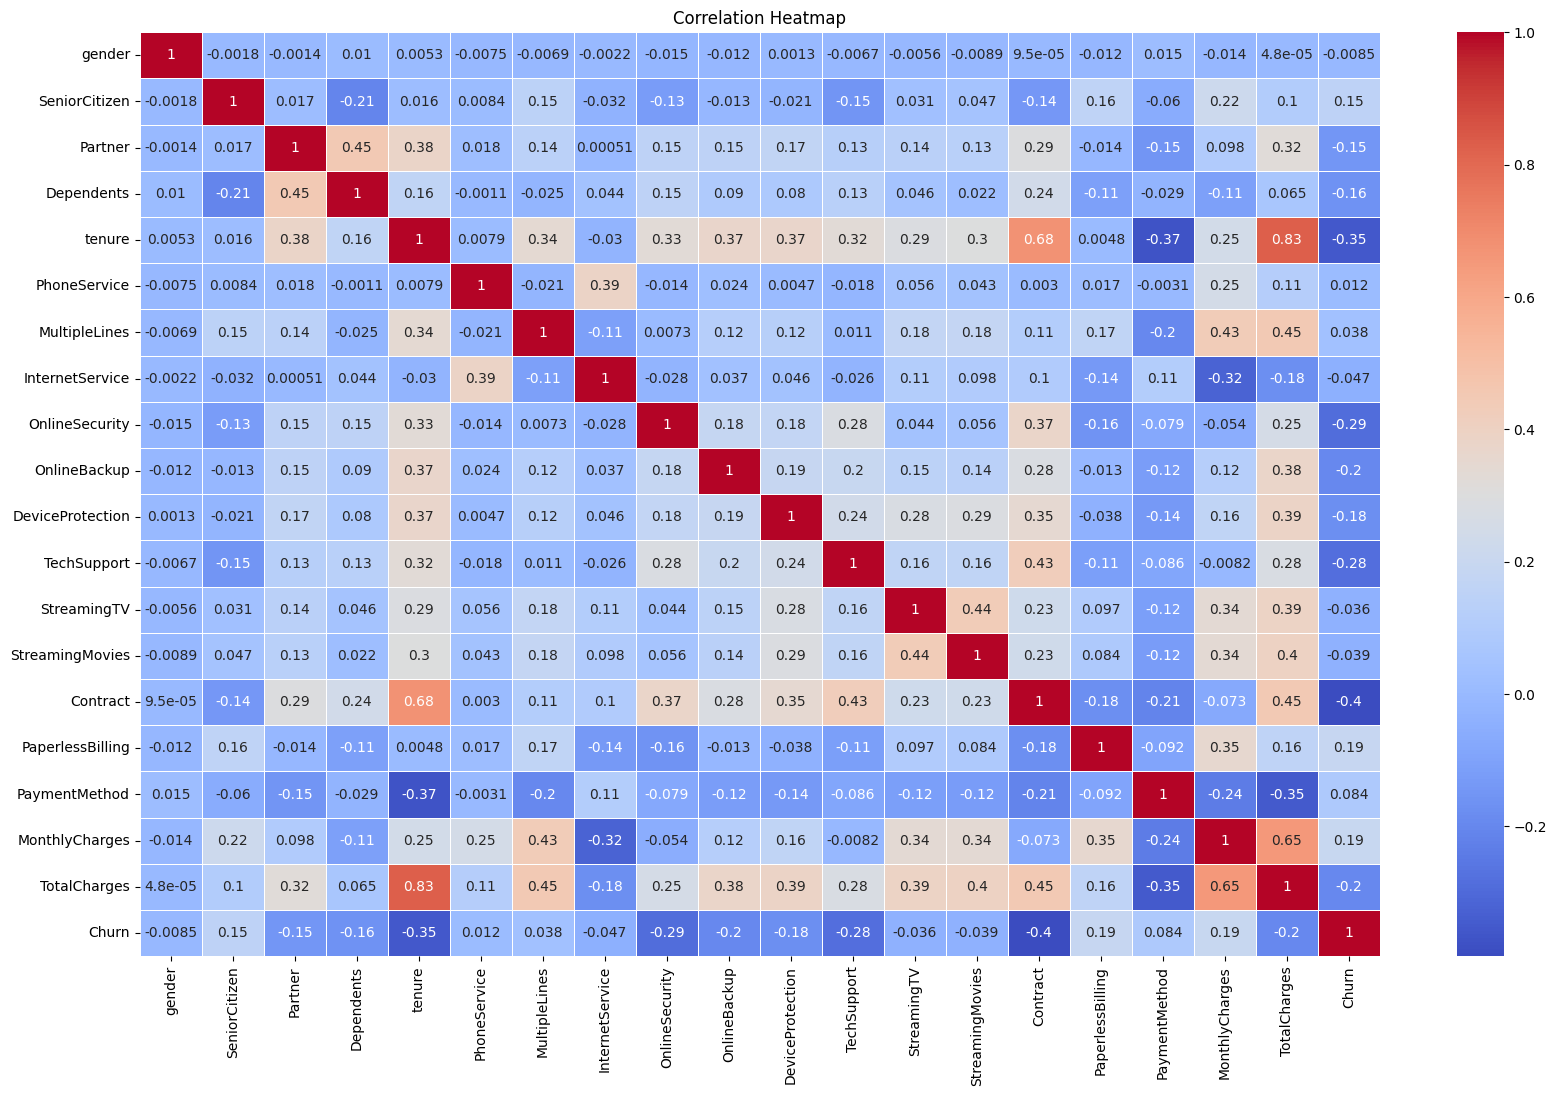

In [79]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

In [80]:
x=df.drop(columns=['Churn','gender','MultipleLines','InternetService','StreamingTV','PaymentMethod'])
y=df['Churn']


**Here I noticed an imbalance in the values in the Target column so I use SMOTE.**

In [81]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [82]:
smote = SMOTE(random_state=42,k_neighbors=15)
X_resampled, y_resampled = smote.fit_resample(x, y)

print(Counter(y_resampled))

Counter({0: 5163, 1: 5163})


In [83]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)


In [84]:
columns_to_scale = ['tenure','TotalCharges','MonthlyCharges']
scaler = StandardScaler()

x_train[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])

x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])

In [85]:
y_test.shape

(3098,)

In [86]:
x_test.shape

(3098, 14)

In [87]:
x_train.shape

(7228, 14)

In [88]:
y_train.shape

(7228,)

# **Model**

KNN

In [89]:
model=KNeighborsClassifier(n_neighbors=17)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.8124596513879923


LogisticRegression

In [90]:
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8001936733376371
Confusion Matrix:
[[1144  405]
 [ 214 1335]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1549
           1       0.77      0.86      0.81      1549

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098



SVM

In [91]:
svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
predict_y = svc_model.predict(x_test)
accuracy_svc = svc_model.score(x_test,y_test)
print(f'SVM accuracy is :{accuracy_svc:.2f}')

SVM accuracy is :0.82


In [92]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

y_train_pred = svm_model.predict(x_train)
y_test_pred = svm_model.predict(x_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))

print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTesting Classification Report:\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.7978693967902601

Training Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79      3614
           1       0.77      0.86      0.81      3614

    accuracy                           0.80      7228
   macro avg       0.80      0.80      0.80      7228
weighted avg       0.80      0.80      0.80      7228

Testing Accuracy: 0.7985797288573273

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78      1549
           1       0.76      0.87      0.81      1549

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098



RandomForestClassifier

In [93]:
rf = RandomForestClassifier(n_estimators=250, max_depth=8)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.8652462645268401
Testing Accuracy: 0.829567462879277


In [94]:
param_grid = {
    'n_estimators': [70, 100,120, 150,250],
    'max_depth': [5, 7,8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(x_test)

print("Optimized Testing Accuracy:", accuracy_score(y_test, y_test_pred))


Optimized Testing Accuracy: 0.8302130406714009


XGB

In [95]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(n_estimators=70, max_depth=7, learning_rate=0.1, random_state=42)

xgb_model.fit(x_train, y_train)

y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")


Training Accuracy: 0.8960
Testing Accuracy: 0.8357


In [96]:
param_grid = {
    'n_estimators': [70, 200, 300],
    'max_depth': [4, 6, 7,8,9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    
}

xgb_model = XGBClassifier(random_state=42)  

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_xgb = grid_search.best_estimator_
y_test_pred = best_xgb.predict(x_test)

# 
print("Optimized Testing Accuracy:", accuracy_score(y_test, y_test_pred))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Optimized Testing Accuracy: 0.8318269851517108


In [97]:
import datetime, pytz; 
print("Current Time in IST:", datetime.datetime.now(pytz.utc).astimezone(pytz.timezone('Asia/Kolkata')).strftime('%Y-%m-%d %H:%M:%S'))

Current Time in IST: 2025-02-12 14:40:28
